

# Project: Breast cancer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be analyzing data associated with female breast cancer. In particular, we will be interested in finding trends between the number of breast cancer deaths, the number of breast cancer new cases, income per person (GDP per capita) and population growth in differents countries in 2006 and 2016. Below are the questions we will be exploring: 
>
> * Have certain regions of the world been growing in breast cancer more than others ?
> * How does income relate to breast cancer deaths ?
> * How does income relate to breast cancer new cases ?
> * How does population growth relate to breast cancer deaths ?
> * How does population growth relate to breast cancer new cases ?
> * Which country in West Africa recorded the most cases of breast cancer deaths in 2006 ?
> * Which country in West Africa recorded the most cases of breast cancer deaths in 2016 ?
> * What is the relationship between breast cancer deaths, income and population ?
>
> The last question will summarize our findings. Therefore, it will help us draw conclusions from the whole analysis.
>
> The datasets used in this project, have been downloaded from [Gapminder](https://www.gapminder.org/data/). 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set(style="darkgrid")

<a id='wrangling'></a>
## Data Wrangling
> Our data consists in six (5) datasets (Gapminder's indicators) in a csv format :
> * "breast_cancer_number_of_female_deaths.csv" : Total number of female deaths due to breast cancer during the certain year.
> * "breast_cancer_number_of_new_female_cases.csv": Total number of new female cases of breast cancer during the certain year.
> * "income_per_person_gdppercapita_ppp_inflation_adjusted.csv": Gross product per person adjusted for differences in purchasing power (in internaional dollars, fixed 2011 prices, PPP base on 2011 ICP) 
> * "population_growth_annual_percent.csv": Annual population growth rate for year t, is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage. Population is based on de facto definition of population, which counts all residents regardless legal status or citizenship.
### General Properties

In [2]:
# We load "breast_cancer_number_of_female_deaths.csv" 
df_deaths = pd.read_csv('breast_cancer_number_of_female_deaths.csv')
df_deaths.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,761.0,817.0,894.0,989.0,1090.0,1180.0,1240.0,1290.0,1340.0,...,2020.0,2090.0,2150.0,2220.0,2280.0,2340.0,2420.0,2510.0,2600.0,2690.0
1,Albania,100.0,103.0,105.0,108.0,111.0,116.0,120.0,126.0,134.0,...,206.0,212.0,214.0,215.0,215.0,215.0,217.0,219.0,221.0,222.0
2,Algeria,701.0,729.0,789.0,852.0,920.0,999.0,1010.0,1040.0,1060.0,...,1700.0,1760.0,1840.0,1910.0,1980.0,2060.0,2150.0,2240.0,2320.0,2390.0
3,Andorra,9.8,10.5,11.1,11.9,12.5,11.9,11.7,11.5,11.4,...,13.2,13.7,14.3,14.6,14.9,15.2,15.4,15.7,15.9,16.0
4,Angola,420.0,432.0,445.0,477.0,513.0,538.0,548.0,554.0,603.0,...,814.0,835.0,852.0,867.0,885.0,909.0,939.0,968.0,1000.0,1030.0


In [3]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 28 columns):
country    187 non-null object
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64


In [4]:
df_new_cases = pd.read_csv('breast_cancer_number_of_new_female_cases.csv')
df_new_cases.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,792.0,852.0,930.0,1020.0,1110.0,1200.0,1260.0,1310.0,1350.0,...,2000.0,2070.0,2140.0,2230.0,2300.0,2370.0,2460.0,2550.0,2640.0,2740.0
1,Albania,171.0,177.0,182.0,187.0,193.0,201.0,209.0,219.0,232.0,...,430.0,443.0,456.0,472.0,476.0,481.0,489.0,496.0,503.0,509.0
2,Algeria,967.0,1040.0,1130.0,1230.0,1350.0,1480.0,1530.0,1590.0,1650.0,...,3040.0,3250.0,3470.0,3720.0,3950.0,4220.0,4500.0,4800.0,5120.0,5460.0
3,Andorra,31.4,34.0,36.3,38.5,39.8,40.1,40.4,41.1,41.8,...,55.8,57.8,59.5,60.8,61.9,63.0,64.2,65.3,66.5,67.5
4,Angola,531.0,550.0,572.0,597.0,623.0,651.0,668.0,685.0,704.0,...,915.0,940.0,967.0,996.0,1030.0,1070.0,1110.0,1150.0,1200.0,1250.0


In [5]:
df_new_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 28 columns):
country    187 non-null object
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
2016       187 non-null float64


In [6]:
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [7]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [8]:
df_pop_growth = pd.read_csv('population_growth_annual_percent.csv')
df_pop_growth.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1.82,1.88,1.94,1.99,2.05,2.11,2.13,2.15,2.21,...,2.510,2.570,2.8100,3.100,3.270,3.320,3.180,2.940,2.690,2.490
1,Albania,3.02,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,...,-0.767,-0.674,-0.4960,-0.269,-0.165,-0.183,-0.207,-0.291,-0.160,-0.092
2,Algeria,2.51,2.49,2.47,2.49,2.56,2.66,2.76,2.84,2.88,...,1.620,1.720,1.8200,1.920,2.010,2.040,2.000,1.920,1.830,1.740
3,Andorra,7.05,6.94,6.69,6.56,6.24,6.00,5.75,5.50,5.31,...,1.410,0.714,-0.0154,-0.830,-1.590,-2.010,-1.960,-1.540,-0.944,-0.410
4,Angola,1.90,1.93,1.95,1.93,1.87,1.79,1.70,1.65,1.68,...,3.560,3.570,3.5700,3.570,3.560,3.530,3.490,3.430,3.370,3.310


In [9]:
df_pop_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 59 columns):
country    194 non-null object
1960       194 non-null float64
1961       194 non-null float64
1962       194 non-null float64
1963       194 non-null float64
1964       194 non-null float64
1965       194 non-null float64
1966       194 non-null float64
1967       194 non-null float64
1968       194 non-null float64
1969       194 non-null float64
1970       194 non-null float64
1971       194 non-null float64
1972       194 non-null float64
1973       194 non-null float64
1974       194 non-null float64
1975       194 non-null float64
1976       194 non-null float64
1977       194 non-null float64
1978       194 non-null float64
1979       194 non-null float64
1980       194 non-null float64
1981       194 non-null float64
1982       194 non-null float64
1983       194 non-null float64
1984       194 non-null float64
1985       194 non-null float64
1986       194 non-null float64


### Data Cleaning 
> In this section, we will be cleaning our data. Indeed, we will join together data from our 5 datasets. The goal is to get a single csv file which columns might look like this: {Country, Year, Indicator1 Value, Indicator2 Value, Indicator3 Value, Indicator4Value}. 
>
> **Steps to follow:**
>
> * Create df_2006 and df_2016 with the following structure {country, year_2006/2016, Indicator1 Value, Indicator2 Value, Indicator3 Value, Indicator4 Value}
> * Rename year_2006 and year_2016 columns' into **year** in df_2006 and df_2016 
> * Append df_2016 to df_2006 in order to get a single dataframe df
> * Export df to a csv file.


##### Reminder

> **Dataframes:**
> * df_deaths: number of breast cancer deaths
> * df_new_cases: breast cancer number of new female cases
> * df_income: income per person
> * df_pop_growth: population growth annual percent

### df_2006
> In the cells below, we will create df_2006 dataframe and fill it with he indicators values in 2006 for all the countries in the datasets.

In [10]:
# we create df_2006 with column "country"
df_2006 = df_deaths[['country']].copy()
df_2006.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [11]:
# we create the column year_2006 
for i in range(df_2006.shape[0]):
    df_2006['year_2006'] = 2006
df_2006['year_2006'].head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: year_2006, dtype: int64

#### Reminder
> Below are indicators we will be using trough this analysis 
> * Breast cancer number of female deaths
> * Breast cancer number of female new cases
> * Income per person, GPD per capita
> * Population growth annual percent

In [12]:
# we create "breast_cancer_number_of_death" column using df_deaths 2006's column data
df_2006['breast_cancer_number_of_death'] = df_deaths[['2006']].copy()
df_2006.head()

,country,year_2006,breast_cancer_number_of_death
0,Afghanistan,2006,1960.0
1,Albania,2006,203.0
2,Algeria,2006,1650.0
3,Andorra,2006,12.8
4,Angola,2006,796.0


In [13]:
# we create "breast_cancer_new_cases" column using df_new_cases 2006's column data
df_2006['breast_cancer_new_cases'] = df_new_cases[['2006']].copy()
df_2006.head()

,country,year_2006,breast_cancer_number_of_death,breast_cancer_new_cases
0,Afghanistan,2006,1960.0,1930.0
1,Albania,2006,203.0,418.0
2,Algeria,2006,1650.0,2840.0
3,Andorra,2006,12.8,53.4
4,Angola,2006,796.0,892.0


In [14]:
# we create "income_per_person" column using df_income 2006's column data
df_2006['income_per_person'] = df_income[['2006']].copy()
df_2006.head()

,country,year_2006,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person
0,Afghanistan,2006,1960.0,1930.0,1160
1,Albania,2006,203.0,418.0,7920
2,Algeria,2006,1650.0,2840.0,12300
3,Andorra,2006,12.8,53.4,42700
4,Angola,2006,796.0,892.0,4600


In [15]:
# we create "population_growth" column using df_pop_growth 2006's column data
df_2006['population_growth'] = df_pop_growth[['2006']].copy()
df_2006.head()

,country,year_2006,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth
0,Afghanistan,2006,1960.0,1930.0,1160,3.230
1,Albania,2006,203.0,418.0,7920,-0.631
2,Algeria,2006,1650.0,2840.0,12300,1.460
3,Andorra,2006,12.8,53.4,42700,2.660
4,Angola,2006,796.0,892.0,4600,3.570


### df_2016
> In the cells below, we will create df_2006 dataframe and fill it with he indicators values in 2016 for all the countries in the datasets.

In [16]:
# we create df_2016 with column "country"
df_2016 = df_deaths[['country']].copy()
df_2016.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [17]:
# we create the column year_2016 
for i in range(df_2016.shape[0]):
    df_2016['year_2016'] = 2016
df_2016['year_2016'].head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: year_2016, dtype: int64

In [18]:
# we create "breast_cancer_number_of_death" column using df_deaths 2016's column data
df_2016['breast_cancer_number_of_death'] = df_deaths[['2016']].copy()
df_2016.head()

,country,year_2016,breast_cancer_number_of_death
0,Afghanistan,2016,2690.0
1,Albania,2016,222.0
2,Algeria,2016,2390.0
3,Andorra,2016,16.0
4,Angola,2016,1030.0


In [19]:
# we create "breast_cancer_new_cases" column using df_new_cases 2016's column data
df_2016['breast_cancer_new_cases'] = df_new_cases[['2016']].copy()
df_2016.head()

,country,year_2016,breast_cancer_number_of_death,breast_cancer_new_cases
0,Afghanistan,2016,2690.0,2740.0
1,Albania,2016,222.0,509.0
2,Algeria,2016,2390.0,5460.0
3,Andorra,2016,16.0,67.5
4,Angola,2016,1030.0,1250.0


In [20]:
# we create "income_per_person" column using df_income 2016's column data
df_2016['income_per_person'] = df_income[['2016']].copy()
df_2016.head()

,country,year_2016,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person
0,Afghanistan,2016,2690.0,2740.0,1740
1,Albania,2016,222.0,509.0,11400
2,Algeria,2016,2390.0,5460.0,14000
3,Andorra,2016,16.0,67.5,48200
4,Angola,2016,1030.0,1250.0,6030


In [21]:
# we create "population_growth" column using df_pop_growth 2016's column data
df_2016['population_growth'] = df_pop_growth[['2016']].copy()
df_2016.head()

,country,year_2016,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth
0,Afghanistan,2016,2690.0,2740.0,1740,2.690
1,Albania,2016,222.0,509.0,11400,-0.160
2,Algeria,2016,2390.0,5460.0,14000,1.830
3,Andorra,2016,16.0,67.5,48200,-0.944
4,Angola,2016,1030.0,1250.0,6030,3.370


In [22]:
# rename df_2006's "year_2006" column to "year"
df_2006.columns = ['country', 'year', 'breast_cancer_number_of_death',
       'breast_cancer_new_cases', 'income_per_person', 'population_growth']
df_2006.columns

Index(['country', 'year', 'breast_cancer_number_of_death',
       'breast_cancer_new_cases', 'income_per_person', 'population_growth'],
      dtype='object')

In [23]:
# rename df_2016's "year_2016" column to "year"
df_2016.columns = ['country', 'year', 'breast_cancer_number_of_death',
       'breast_cancer_new_cases', 'income_per_person', 'population_growth']
df_2016.columns

Index(['country', 'year', 'breast_cancer_number_of_death',
       'breast_cancer_new_cases', 'income_per_person', 'population_growth'],
      dtype='object')

In [24]:
# Append df_2006 and df_2016 dataframes to obtain a single dataframe df.
df = df_2006.append(df_2016, ignore_index=True)
df.head()

,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth
0,Afghanistan,2006,1960.0,1930.0,1160,3.230
1,Albania,2006,203.0,418.0,7920,-0.631
2,Algeria,2006,1650.0,2840.0,12300,1.460
3,Andorra,2006,12.8,53.4,42700,2.660
4,Angola,2006,796.0,892.0,4600,3.570


In [25]:
# checking
df.tail()

,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth
369,Venezuela,2016,2220.0,7380.0,67100,-0.331
370,Vietnam,2016,5190.0,9720.0,38900,1.250
371,Yemen,2016,1290.0,1850.0,53300,0.714
372,Zambia,2016,492.0,581.0,20000,0.734
373,Zimbabwe,2016,870.0,1030.0,6040,0.362


In [26]:
# we export df to csv file
df.to_csv('breast_cancer_indicators_2006_2016.csv')

#### Summary
> In this section, we reshaped our data. Indeed, we joinned together data from four datasets. At the end we obtained a single dataset entitled : "breast_cancer_indicators_2006_2016.csv"

<a id='eda'></a>
## Exploratory Data Analysis
### Have certain regions of the world been growing in breast cancer more than others ?
> To answer this question, we will first, find the most affected countries by breast cancer in 2006 and 2016. To do this, we will calculate the mean of all the deaths due to breast cancer in 2006 and 2016 and compare it to the number of deaths in each country of our dataset. 
> 
> Second, we assume that the mean of all the deaths due to breast cancer in 2006 is the reference which will help us see how some countries have been growing in breast cancer more than others by plotting the number of deaths recorded in 2006 and 2016 on the one hand and on the other hand, by checking if the number of new cases has grow as well from 2006 and 2016 in these countries.
>
> Regarding the trends we will draw specific conclusions.


In [27]:
# average number of deaths due to breast cancer groupby year
average_deaths = df.groupby('year')['breast_cancer_number_of_death'].mean()

In [28]:
# recover average deaths in 2006 and 2016 respectively
list_average_deaths = []
for index, values in average_deaths.iteritems():
    list_average_deaths.append(values)
print(list_average_deaths)

[2442.6937967914437, 2846.052673796791]


> We can see that the average number of deaths in 2016 is more than in 2006. **Thus, it can be inferred that the number of breast cancer deaths increases from 2006 to 2016 all over the world**. What about countries which number of deaths is greater than the mean ?

In [29]:
# countries with breast cancer deaths greater than average_deaths in 2006 and 2016
deaths_in_2006 = (df.year == 2006)
deaths_in_2016 = (df.year == 2016)
df_mean_2006 = df[deaths_in_2006].query('breast_cancer_number_of_death > {}'.format(list_average_deaths[0]))[['country','breast_cancer_number_of_death']]
df_mean_2016 = df[deaths_in_2016].query('breast_cancer_number_of_death > {}'.format(list_average_deaths[0]))[['country','breast_cancer_number_of_death']]

In [30]:
# df_mean_2006 and df_mean_2016 shapes
print(df_mean_2006.shape)
print(df_mean_2016.shape)

(32, 2)
(39, 2)


In [31]:
df_mean_2006.head()

,country,breast_cancer_number_of_death
6,Argentina,5960.0
8,Australia,2740.0
13,Bangladesh,3780.0
16,Belgium,2470.0
23,Brazil,13600.0


In [32]:
df_mean_2016.head()

,country,breast_cancer_number_of_death
187,Afghanistan,2690.0
193,Argentina,6400.0
195,Australia,3200.0
200,Bangladesh,4770.0
203,Belgium,2560.0


In [33]:
# inner join df_mean_2006 and df_mean_2016 on country. The result will be countries which number of breast cancer death is 
# higher than the mean of deaths in 2006 and 2016.
df_combined = pd.merge(df_mean_2006,df_mean_2016, how='inner', on='country')
df_combined.head()

,country,breast_cancer_number_of_death_x,breast_cancer_number_of_death_y
0,Argentina,5960.0,6400.0
1,Australia,2740.0,3200.0
2,Bangladesh,3780.0,4770.0
3,Belgium,2470.0,2560.0
4,Brazil,13600.0,16700.0


In [34]:
# rename columns of df_combined
df_combined.rename(columns={"breast_cancer_number_of_death_x":"breast_cancer_number_of_death_2006","breast_cancer_number_of_death_y":"breast_cancer_number_of_death_2016"}, inplace=True)
df_combined.head()

,country,breast_cancer_number_of_death_2006,breast_cancer_number_of_death_2016
0,Argentina,5960.0,6400.0
1,Australia,2740.0,3200.0
2,Bangladesh,3780.0,4770.0
3,Belgium,2470.0,2560.0
4,Brazil,13600.0,16700.0


In [35]:
# plot in the same graph
df_combined = df_combined.melt(id_vars='country', var_name='breast_cancer_number_of_death_year', value_name='breast_cancer_number_of_death')
df_combined.head()

,country,breast_cancer_number_of_death_year,breast_cancer_number_of_death
0,Argentina,breast_cancer_number_of_death_2006,5960.0
1,Australia,breast_cancer_number_of_death_2006,2740.0
2,Bangladesh,breast_cancer_number_of_death_2006,3780.0
3,Belgium,breast_cancer_number_of_death_2006,2470.0
4,Brazil,breast_cancer_number_of_death_2006,13600.0


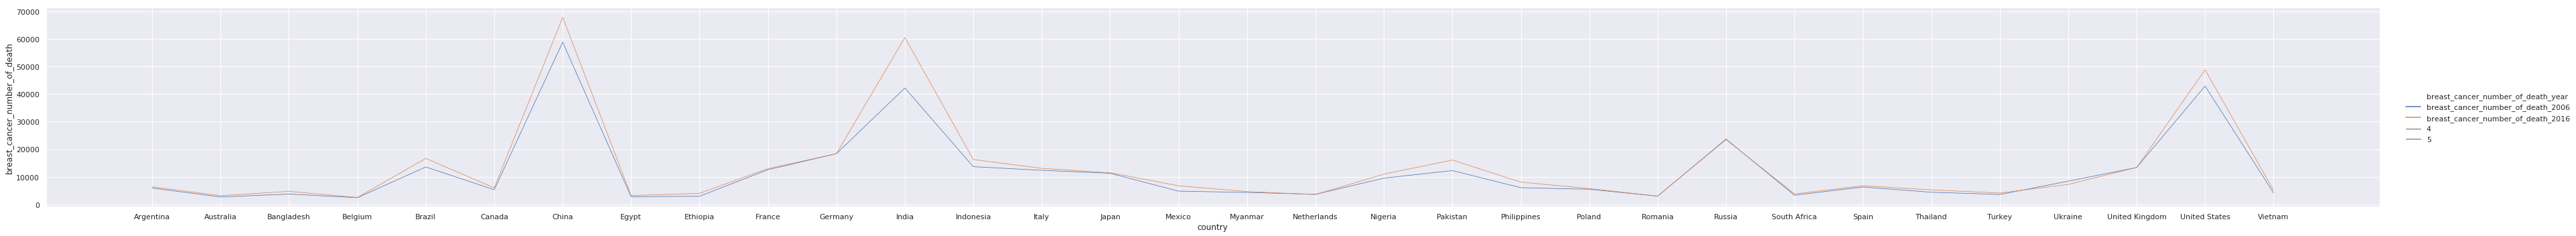

In [36]:
#plot
#please, double click on the plot to see it big
sns.relplot(x="country", y="breast_cancer_number_of_death",hue="breast_cancer_number_of_death_year", kind="line",size=5, aspect=10, data=df_combined);

In [37]:
# merge data to get countries which are not in df_mean_2006 but are in df_mean_2016
df_difference = pd.merge(df_mean_2006,df_mean_2016, how='outer', on='country', indicator=True)
df_difference = df_difference[df_difference['_merge']=='right_only']
df_difference

,country,breast_cancer_number_of_death_x,breast_cancer_number_of_death_y,_merge
32,Afghanistan,NaN,2690.0,right_only
33,Colombia,NaN,2950.0,right_only
34,"Congo, Dem. Rep.",NaN,2790.0,right_only
35,Iran,NaN,3080.0,right_only
36,Iraq,NaN,2620.0,right_only
37,Morocco,NaN,3090.0,right_only
38,South Korea,NaN,2890.0,right_only


In [38]:
# drop columns "breast_cancer_number_of_death_x" and "_merge"
df_difference.drop(['breast_cancer_number_of_death_x','_merge'],axis=1, inplace=True)
df_difference

,country,breast_cancer_number_of_death_y
32,Afghanistan,2690.0
33,Colombia,2950.0
34,"Congo, Dem. Rep.",2790.0
35,Iran,3080.0
36,Iraq,2620.0
37,Morocco,3090.0
38,South Korea,2890.0


In [39]:
df_difference.rename(columns={"breast_cancer_number_of_death_y":"breast_cancer_number_of_death"}, inplace=True)
df_difference

,country,breast_cancer_number_of_death
32,Afghanistan,2690.0
33,Colombia,2950.0
34,"Congo, Dem. Rep.",2790.0
35,Iran,3080.0
36,Iraq,2620.0
37,Morocco,3090.0
38,South Korea,2890.0


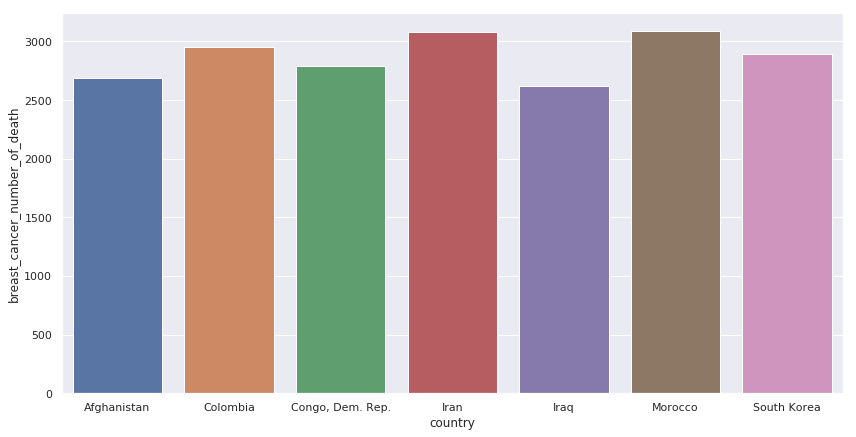

In [40]:
plt.figure(figsize=(14,7))
sns.barplot(x= df_difference.country, y=df_difference.breast_cancer_number_of_death);

In [41]:
# countries with breast cancer deaths greater than average_deaths in 2006 and 2016
deaths_in_2006 = (df.year == 2006)
deaths_in_2016 = (df.year == 2016)
df_mean_2006 = df[deaths_in_2006].query('breast_cancer_number_of_death > {}'.format(list_average_deaths[0]))[['country','breast_cancer_new_cases']]
df_mean_2016 = df[deaths_in_2016].query('breast_cancer_number_of_death > {}'.format(list_average_deaths[0]))[['country','breast_cancer_new_cases']]

In [42]:
# inner join df_mean_2006 and df_mean_2016 on country. 
df_combined = pd.merge(df_mean_2006,df_mean_2016, how='inner', on='country')
df_combined.head()

,country,breast_cancer_new_cases_x,breast_cancer_new_cases_y
0,Argentina,13000.0,16400.0
1,Australia,12600.0,15700.0
2,Bangladesh,5620.0,8820.0
3,Belgium,9500.0,10400.0
4,Brazil,33000.0,46900.0


In [43]:
# rename columns of df_combined
df_combined.rename(columns={"breast_cancer_new_cases_x":"breast_cancer_new_cases_2006","breast_cancer_new_cases_y":"breast_cancer_new_cases_2016"}, inplace=True)
df_combined.head()

,country,breast_cancer_new_cases_2006,breast_cancer_new_cases_2016
0,Argentina,13000.0,16400.0
1,Australia,12600.0,15700.0
2,Bangladesh,5620.0,8820.0
3,Belgium,9500.0,10400.0
4,Brazil,33000.0,46900.0


In [44]:
# plot in the same graph
df_combined = df_combined.melt(id_vars='country', var_name='breast_cancer_new_cases_year', value_name='breast_cancer_new_cases')
df_combined.head()

,country,breast_cancer_new_cases_year,breast_cancer_new_cases
0,Argentina,breast_cancer_new_cases_2006,13000.0
1,Australia,breast_cancer_new_cases_2006,12600.0
2,Bangladesh,breast_cancer_new_cases_2006,5620.0
3,Belgium,breast_cancer_new_cases_2006,9500.0
4,Brazil,breast_cancer_new_cases_2006,33000.0


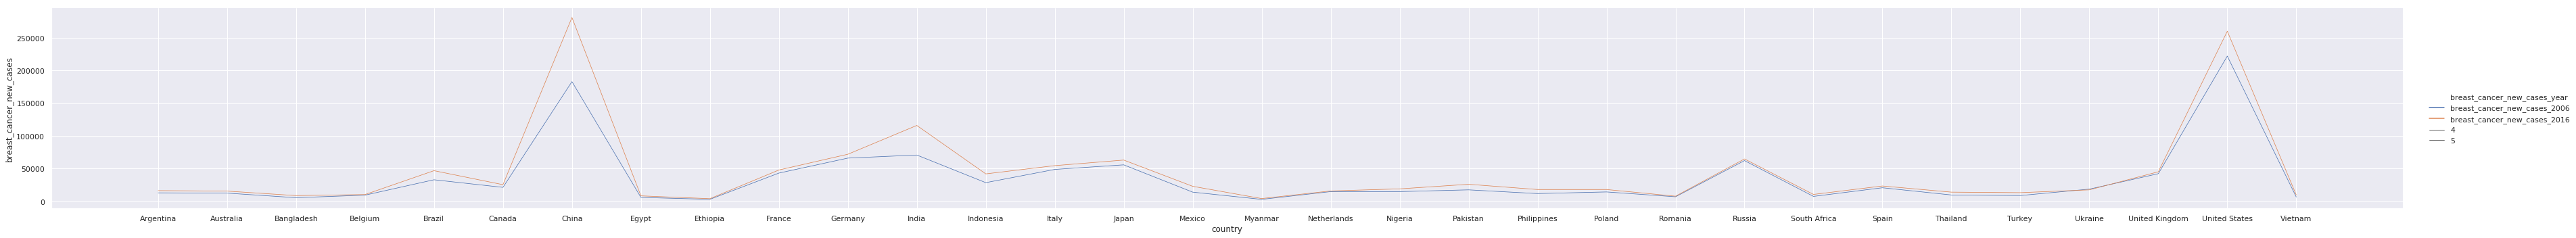

In [45]:
#plot
#please, double click on the plot to see it big
sns.relplot(x="country", y="breast_cancer_new_cases",hue="breast_cancer_new_cases_year", ci=None, kind="line",size=5, aspect=10, data=df_combined);

### How does income relate to breast cancer deaths ?
> According to the [World Bank Group development report](http://datatopics.worldbank.org/world-development-indicators/stories/the-classification-of-countries-by-income.html), countries are classified into four income groups: **low, low middle, upper middle, high**. The income classification is based on a measure of national income per person, or GNI per capita (**in US dollar**). Despite the fact that our dataset provides us with GDP per capita, we will use GNI per capita to classify countries into their income group, since they are almost the same. Indeed, GNI per capita comprises GDP plus net receipts of primary income (compensation of employees and property income) from non-resident sources. [More information here](http://datatopics.worldbank.org/world-development-indicators/themes/economy.html#gross-national-income)
>
> [In 2006](http://databank.worldbank.org/data/download/site-content/OGHIST.xls)
> * low: 905 or less
> * low middle: 906 - 3,595 
> * upper middle: 3,956 - 12,235
> * high:  12,235 or more
> 
> [In 2016](http://databank.worldbank.org/data/download/site-content/OGHIST.xls)
> * low: 1,005 or less
> * low middle: 1,006 - 3,955 
> * upper middle: 3,956 - 11,115
> * high:  11,115 or more
> 
> We will be plotting breast cancer deaths based on income groups in 2006 and 2016. 
Thus, we will observe how income variations (we will compute them between years 2006 and 2016) can impact or not breast cancer number of deaths.  

**Steps for drawing relationship between income and number of deaths**
> * Create an "income_groups" column with the following groups, based on income: low, low middle, upper middle, high.
> 
> * Group countries by income_groups
>
> * Plot countries obtained from grouping (bar chart)
> 
> * Plot number of deaths according to grouping  (countries on the horizontal x-axis, number of deaths on the y-axis)

In [46]:
# let's create df_income_groups dataframe, a copy of df dataframe to which we will add income_groups column
df_income_groups = df.copy()
df_income_groups.head()

,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth
0,Afghanistan,2006,1960.0,1930.0,1160,3.230
1,Albania,2006,203.0,418.0,7920,-0.631
2,Algeria,2006,1650.0,2840.0,12300,1.460
3,Andorra,2006,12.8,53.4,42700,2.660
4,Angola,2006,796.0,892.0,4600,3.570


In [47]:
# create an empty comlumn income_groups
df_income_groups['income_groups'] = ""
df_income_groups.head()

,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth,income_groups
0,Afghanistan,2006,1960.0,1930.0,1160,3.230,
1,Albania,2006,203.0,418.0,7920,-0.631,
2,Algeria,2006,1650.0,2840.0,12300,1.460,
3,Andorra,2006,12.8,53.4,42700,2.660,
4,Angola,2006,796.0,892.0,4600,3.570,


In [48]:
# We want to associate each country with its income group.
# To do this, we will be creating a function, "income_group", which takes countries' income,
# the upper end and the lower end of gdp per capita's ranges, "gdp_list" and
# the income groups list, "group_list"
# the function "income_group" has been designed regarding "gdp_list" in 2006 and 2016 
# ([905, 3595, 12235] and [1005, 3955, 11115] respectively) and "group_list" 
# (['low', 'low middle', 'upper middle', 'high'])
def income_group (income, gdp_list, group_list):
    """ This function's goal is to return income groups in terms of gdp per capita"""
    if (income <= gdp_list[0]):
        return group_list[0]
    elif( (gdp_list[0] + 1) <= income <= gdp_list[1]):
        return group_list[1]
    elif ( (gdp_list[1] + 1) <= income <= gdp_list[2]):
        return group_list[2]
    else:
        return group_list[3]

income_groups = ['low', 'low middle', 'upper middle', 'high']
gdp_group_2006 = [905, 3595, 12235]
gdp_group_2016 = [1005, 3955, 11115]
df_income_groups.groupby('year')

for index, rows in df_income_groups.iterrows():
    if (int(df_income_groups.iloc[index][1]) == 2006):
        df_income_groups['income_groups'][index] = income_group(int(df_income_groups.iloc[index][4]), gdp_group_2006, income_groups)
    df_income_groups['income_groups'][index] = income_group(int(df_income_groups.iloc[index][4]), gdp_group_2016, income_groups)
df_income_groups.head()
    

/home/pamely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pamely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth,income_groups
0,Afghanistan,2006,1960.0,1930.0,1160,3.230,low middle
1,Albania,2006,203.0,418.0,7920,-0.631,upper middle
2,Algeria,2006,1650.0,2840.0,12300,1.460,high
3,Andorra,2006,12.8,53.4,42700,2.660,high
4,Angola,2006,796.0,892.0,4600,3.570,upper middle


In [49]:
# get total counts of each income group
number_income_groups = df_income_groups.groupby('income_groups')['income_groups'].count()
number_income_groups

income_groups
high            181
low              15
low middle       94
upper middle     84
Name: income_groups, dtype: int64

In [50]:
# get total count of breat cancer death per income group
number_death_income_groups = df_income_groups.groupby('income_groups')['breast_cancer_number_of_death'].sum()
number_death_income_groups

income_groups
high            567471.93
low              29845.00
low middle      131564.08
upper middle    260114.58
Name: breast_cancer_number_of_death, dtype: float64

In [51]:
# get proportion of income by dividing number_income_groups by the total of income_groups 
total_income_groups = number_income_groups.sum()
income_groups_proportion = number_income_groups / total_income_groups
income_groups_proportion

income_groups
high            0.483957
low             0.040107
low middle      0.251337
upper middle    0.224599
Name: income_groups, dtype: float64

In [52]:
# get proportion of breast cancer number of death by dividing number_death_income_groups by the total of breast 
# cancer death 
total_breast_cancer_deaths = number_death_income_groups.sum()

deaths_income_groups_proportion = number_death_income_groups / total_breast_cancer_deaths
deaths_income_groups_proportion

income_groups
high            0.573786
low             0.030177
low middle      0.133028
upper middle    0.263009
Name: breast_cancer_number_of_death, dtype: float64

In [53]:
ind = np.arange(len(income_groups_proportion))  # the x locations for the groups
width = 0.35       # the width of the bars

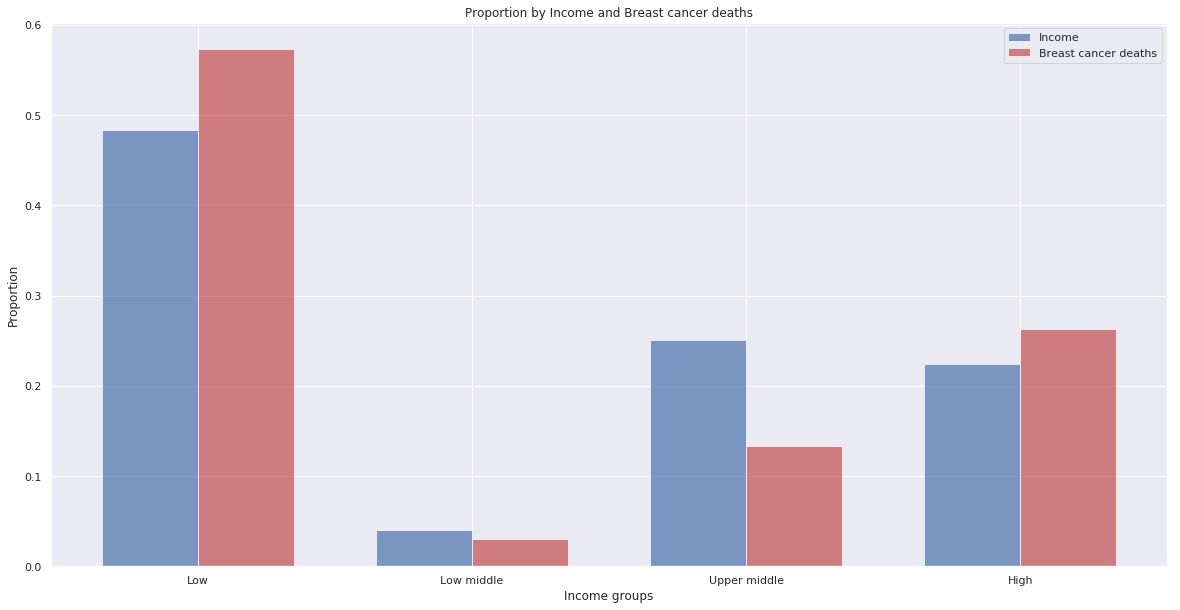

In [54]:
# plot bars
plt.figure(figsize=(20,10))
income_bar = plt.bar(ind, income_groups_proportion, width, color='b', alpha=.7, label='Income');
deaths_bar = plt.bar(ind + width, deaths_income_groups_proportion, width, color='r', alpha=.7, label='Breast cancer deaths');
# title and labels

plt.ylabel('Proportion')
plt.xlabel('Income groups')
plt.title('Proportion by Income and Breast cancer deaths')
locations = ind + width / 2  # xtick locations
labels = ['Low', 'Low middle', 'Upper middle', 'High']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();


### How does income relate to breast cancer new cases ?

In [55]:
# get total count of breat cancer new cases per income group
number_new_cases_income_groups = df_income_groups.groupby('income_groups')['breast_cancer_new_cases'].sum()
number_new_cases_income_groups

income_groups
high            1920173.21
low               62160.00
low middle       237162.84
upper middle     745997.10
Name: breast_cancer_new_cases, dtype: float64

In [56]:
# get proportion of breast cancer new cases by dividing number_new_cases_income_groups by the total of breast 
# cancer new cases 
total_breast_cancer_new_cases = number_new_cases_income_groups.sum()
new_cases_income_groups_proportion = number_new_cases_income_groups/ total_breast_cancer_new_cases
new_cases_income_groups_proportion

income_groups
high            0.647506
low             0.020961
low middle      0.079974
upper middle    0.251559
Name: breast_cancer_new_cases, dtype: float64

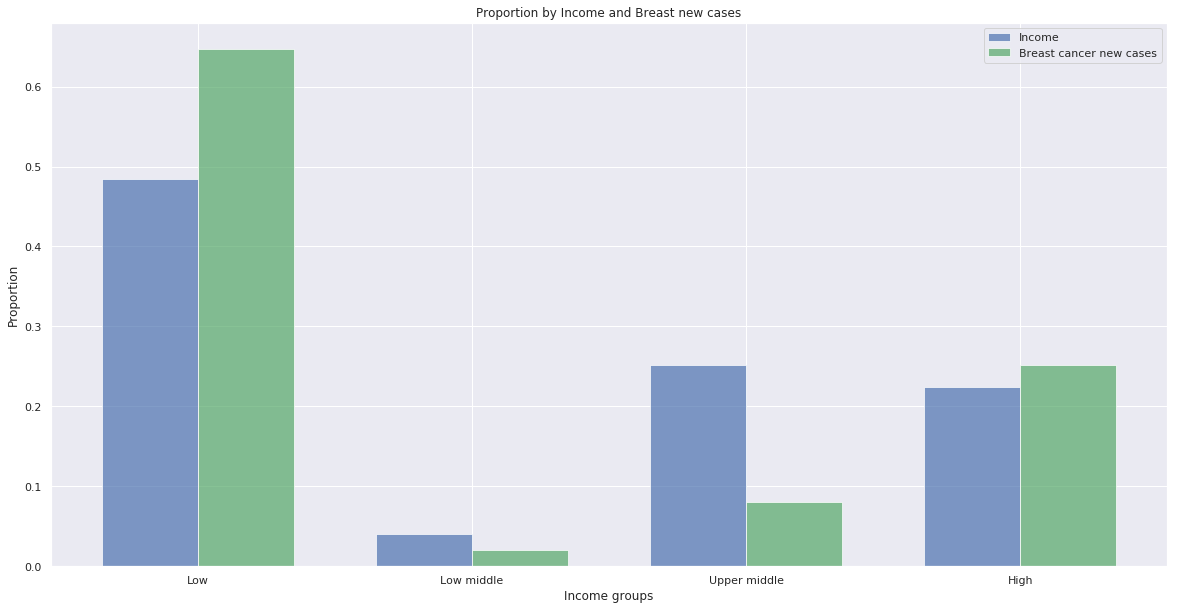

In [57]:
# plot bars
plt.figure(figsize=(20,10))
income_bar = plt.bar(ind, income_groups_proportion, width, color='b', alpha=.7, label='Income');
new_cases_bar = plt.bar(ind + width, new_cases_income_groups_proportion, width, color='g', alpha=.7, label='Breast cancer new cases');
# title and labels
plt.ylabel('Proportion')
plt.xlabel('Income groups')
plt.title('Proportion by Income and Breast new cases')
locations = ind + width / 2  # xtick locations
labels = ['Low', 'Low middle', 'Upper middle', 'High']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

### How does population growth  relate to breast cancer deaths?

In [58]:
# get total count of breat cancer death per income group
pop_growth_income_groups = df_income_groups.groupby('income_groups')['population_growth'].sum()
pop_growth_income_groups

income_groups
high            237.6562
low              35.4100
low middle      156.0446
upper middle    124.5338
Name: population_growth, dtype: float64

In [59]:
# get proportion of population growth by dividing pop_growth_income_groups by the total of population
# growth 
total_pop_growth = pop_growth_income_groups.sum()
pop_growth_income_groups_proportion = pop_growth_income_groups/ total_pop_growth
pop_growth_income_groups_proportion

income_groups
high            0.429258
low             0.063958
low middle      0.281850
upper middle    0.224935
Name: population_growth, dtype: float64

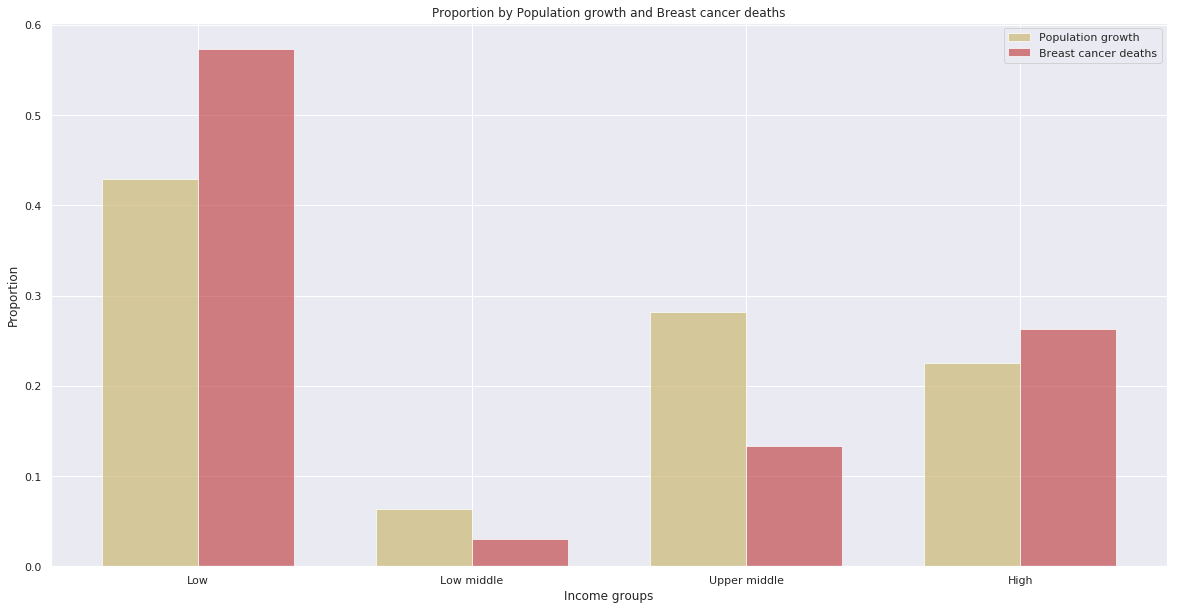

In [60]:
# plot bars
plt.figure(figsize=(20,10))
pop_growth_bar = plt.bar(ind, pop_growth_income_groups_proportion, width, color='y', alpha=.7, label='Population growth');
deaths_bar = plt.bar(ind + width, deaths_income_groups_proportion, width, color='r', alpha=.7, label='Breast cancer deaths');
# title and labels

plt.ylabel('Proportion')
plt.xlabel('Income groups')
plt.title('Proportion by Population growth and Breast cancer deaths')
locations = ind + width / 2  # xtick locations
labels = ['Low', 'Low middle', 'Upper middle', 'High']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

### How does population growth  relate to breast cancer new cases?

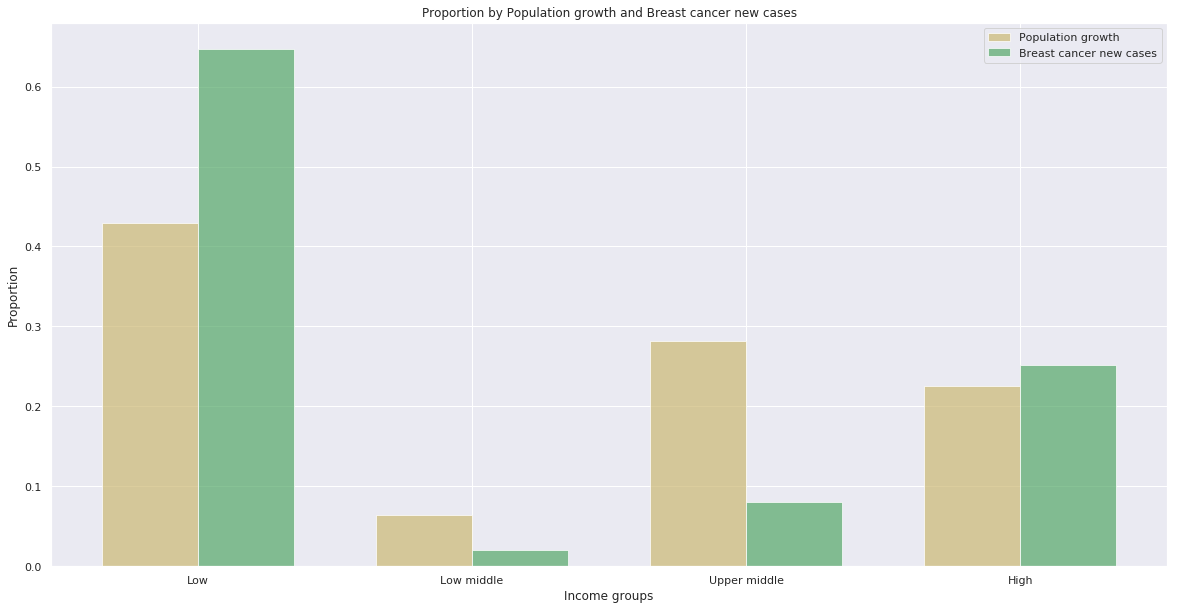

In [61]:
# plot bars
plt.figure(figsize=(20,10))
pop_growth_bar = plt.bar(ind, pop_growth_income_groups_proportion, width, color='y', alpha=.7, label='Population growth');
new_cases_bar = plt.bar(ind + width, new_cases_income_groups_proportion, width, color='g', alpha=.7, label='Breast cancer new cases');
# title and labels

plt.ylabel('Proportion')
plt.xlabel('Income groups')
plt.title('Proportion by Population growth and Breast cancer new cases')
locations = ind + width / 2  # xtick locations
labels = ['Low', 'Low middle', 'Upper middle', 'High']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend();

### Which country in West Africa record the highest number of breast cancer deaths in 2006 ?
> In this section, we will be plotting breasts cancer deaths in west Africa's country. Then will know the country in which there is the highest number of deaths. We will plot in 2006 as well as in 2016. [West Africa countries](https://www.gapminder.org/data/).

In [62]:
# df_west_africa_countries is  df_income_groups with only west africa's countries
west_africa_countries = ["Benin", "Burkina Faso", "Cape Verde", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Cote d'Ivoire", "Liberia", "Mali", "Mauritania", "Niger", "Nigeria", "Senegal", "Sierra Leone","Togo"]
df_west_africa_countries = df_income_groups[[country in west_africa_countries for country in df_income_groups.country]].copy()
df_west_africa_countries.head()

,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth,income_groups
18,Benin,2006,292.0,309.0,1750,2.90,low middle
26,Burkina Faso,2006,403.0,380.0,1270,2.99,low middle
31,Cape Verde,2006,15.7,23.1,4950,1.30,upper middle
41,Cote d'Ivoire,2006,1030.0,1090.0,2670,1.96,low middle
61,Gambia,2006,29.9,35.5,1510,3.19,low middle


In [63]:
# we sort df_west_africa_countries for plotting
df_west_africa_countries_2006 = df_west_africa_countries.query('year == 2006').sort_values(by='breast_cancer_number_of_death')
df_west_africa_countries_2006

,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth,income_groups
31,Cape Verde,2006,15.7,23.1,4950,1.3000,upper middle
61,Gambia,2006,29.9,35.5,1510,3.1900,low middle
69,Guinea-Bissau,2006,80.7,76.9,1340,2.2800,low middle
94,Liberia,2006,131.0,150.0,624,3.4500,low
106,Mauritania,2006,139.0,158.0,3450,0.0442,low middle
145,Sierra Leone,2006,205.0,253.0,45500,2.3500,high
168,Togo,2006,217.0,242.0,5890,0.6280,upper middle
18,Benin,2006,292.0,309.0,1750,2.9000,low middle
121,Niger,2006,337.0,359.0,32600,0.1610,high
68,Guinea,2006,357.0,376.0,1200,2.0600,low middle


In [64]:
# get total count of breat cancer deaths 
deaths_west_africa_2006 = df_west_africa_countries_2006['breast_cancer_number_of_death'].sum()
deaths_west_africa_2006

14528.3

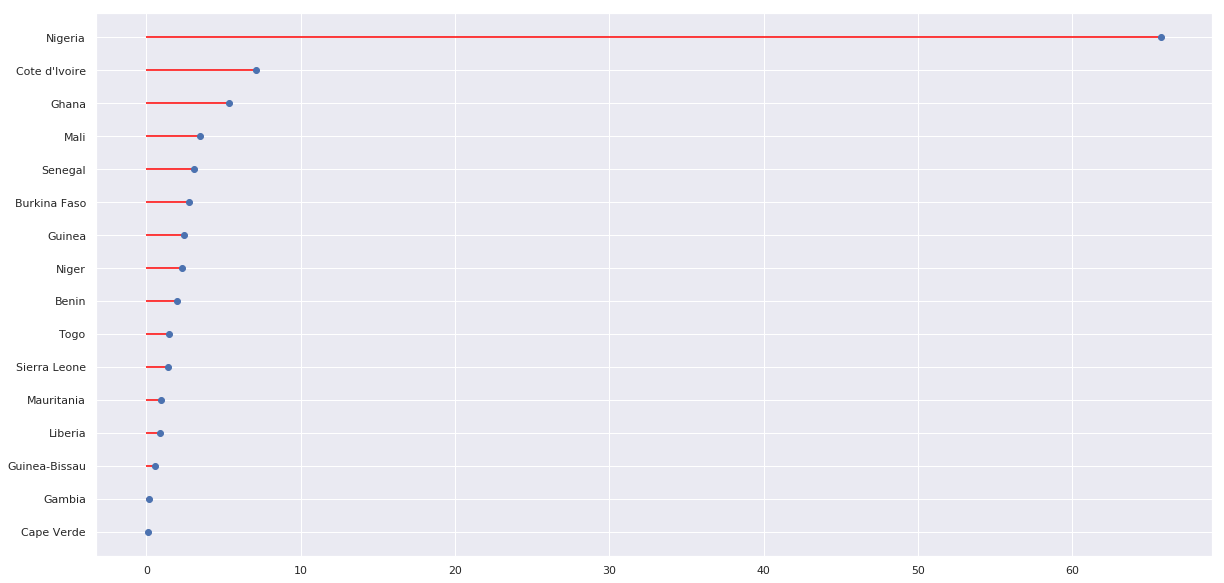

In [65]:
# breast cancer deaths in west africa in percentage 
deaths_west_africa_proportion = df_west_africa_countries_2006['breast_cancer_number_of_death']/deaths_west_africa_2006*100
# lollipop plot
plt.figure(figsize=(20,10))
plt.hlines(y = df_west_africa_countries_2006['country'], xmin = 0, xmax = deaths_west_africa_proportion, color = 'red')
plt.plot(deaths_west_africa_proportion, df_west_africa_countries_2006['country'],"o");

### Which country in West Africa record the highest number of breast cancer deaths in 2016 ?

In [66]:
# we sort df_west_africa_countries for plotting
df_west_africa_countries_2016 = df_west_africa_countries.query('year == 2016').sort_values(by='breast_cancer_number_of_death')
df_west_africa_countries_2016

,country,year,breast_cancer_number_of_death,breast_cancer_new_cases,income_per_person,population_growth,income_groups
218,Cape Verde,2016,20.6,35.3,6080,1.240,upper middle
248,Gambia,2016,46.7,55.5,1570,3.030,low middle
256,Guinea-Bissau,2016,108.0,109.0,1470,2.520,low middle
293,Mauritania,2016,205.0,252.0,3570,0.136,low middle
281,Liberia,2016,210.0,238.0,754,2.510,low
332,Sierra Leone,2016,298.0,362.0,50500,2.200,high
355,Togo,2016,348.0,378.0,3300,1.090,low middle
205,Benin,2016,435.0,463.0,2010,2.760,low middle
308,Niger,2016,489.0,519.0,35300,0.532,high
255,Guinea,2016,502.0,538.0,1220,2.490,low middle


In [67]:
# get total count of breat cancer deaths 
deaths_west_africa_2016 = df_west_africa_countries_2016['breast_cancer_number_of_death'].sum()
deaths_west_africa_2016

18013.3

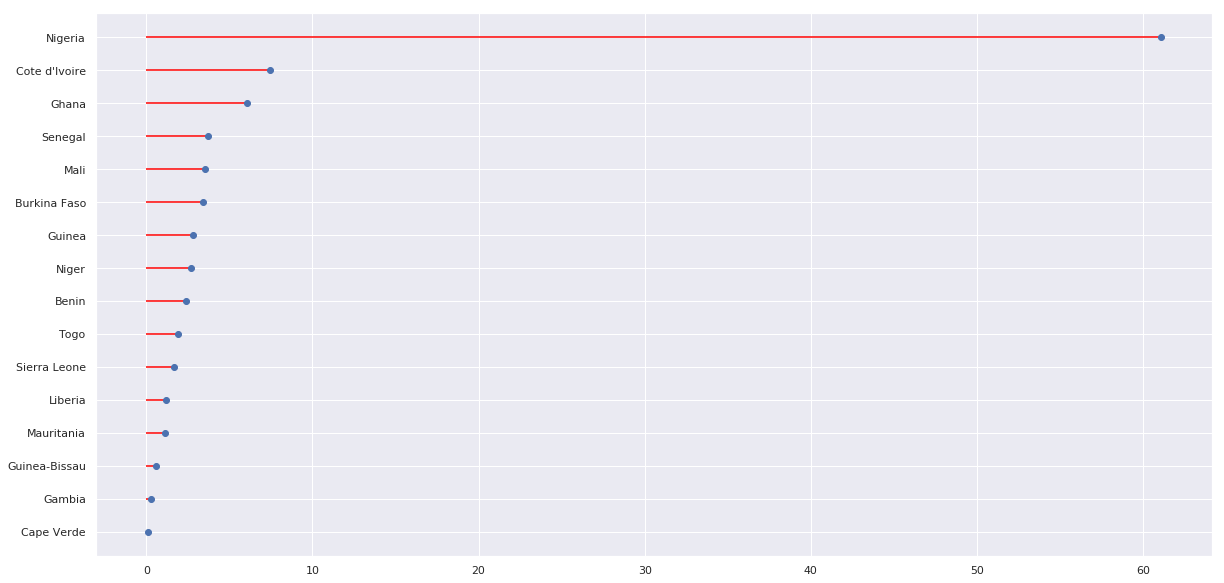

In [68]:
# breast cancer deaths in west africa in percentage 
deaths_west_africa_proportion = df_west_africa_countries_2016['breast_cancer_number_of_death']/deaths_west_africa_2016*100
# lollipop plot
plt.figure(figsize=(20,10))
plt.hlines(y = df_west_africa_countries_2016['country'], xmin = 0, xmax = deaths_west_africa_proportion, color = 'red')
plt.plot(deaths_west_africa_proportion, df_west_africa_countries_2016['country'],"o");

<a id='conclusions'></a>
## Conclusions
In the previous section, we explore our data. Indeed, we created visualizations regarding the research questions we have been addressing. In this section, we will be summarizing our findings and the results that have been performed.

> **Note:** The number of breast cancer deaths/new cases used for visualizations is greater than the average number of breast cancer deaths/new cases in 2006 and 2016. 
>
* **Have certain regions of the world been growing in breast cancer more than others ?**
  * After plotting the number of breast cancer deaths per country in 2006 and 2016, we notice that both of the plots have the quite same shape. Indeed, countries that represent 2006's plot spikes are the same on 2016's plot. These countries are: **Brazil, China, India, Japan, Paskistan, Russia, United States**. Nevertheless, we should note that, the number of breast cancers deaths significantly grow from 2006 to 2016. In fact, 2006's plot overlaps 2016 ones, especially on the spikes. However, the number of breast cancer deaths didn't increase much for countries like : Russia, Romania, Poland, South Africa. From this findings, it can be inferred that breast cancer is growing faster and more in some countries than others. <br/> <br/>
  * We notice that some countries are not on 2006 breast cancer deaths plot but are on 2016 one. These countries are: **Afganistan, Columbia, Congo Dem Rep, Iran, Iraq, Morocco, South Korea**. This is a proof that these countries grow in breast cancer more than others. <br/> <br/>
  * After visualizing the number of breast cancer new cases per country in 2006 and 2016, we can notice that its distribution is the same as breast cancer deaths. Indeed, coutries with high number of breast cancer deaths have a high number of new cases. It should also be noted that breast cancer new cases significantly increased in some countries from 2006 to 2016. Thus, this is growing more in some  countries than others. <br/> <br/>
  * We can notice that developed countries are most affected by breast cancer. It seems like there could exist some factors such as lifestyle or others can be favourable  to the growth of cancer. However, only the number of breast cancer deaths or new cases in countries don't allow to draw objective conclusion about that. <br/> <br/>
* **How does income relate to breast cancer deaths ?**
  * After plotting the proportion of breast cancer deaths in terms of countries income groups, we can observe that people from low and high income countries are more likely to die of breast cancer. It should be noted that breast cancer deaths are significantly higher in low income countries than others. This finding can bring us to the conclusion that there could exist a correlation between breast cancer the economic and social factor status of countries.  <br/> <br/>
* **How does income relate to breast cancer new cases ?**
  * Like breast cancer number of deaths, the proportion of breast cancer new cases are higher in low and high income countries more than others. Nevertheless, more in low income countries. Therefore, the economic situation of countries more specifacally the income per person (GDP per capita) may be favourable to breast cancer. Since the notion of economic status implicitly refers to the notion of social classes, we might wonder which class of people are more prone to breast cancer. This will open up gaps for further analysis. Indeed, much more interesting analyses could then be carried out taking into account other variables such as: the quality of the food consumed, environmental conditions, the quality of hospital infrastructure, etc.  <br/> <br/>  
* **How does population growth relate to breast cancer deaths ?**
  * After plotting the proportion of breast cancer deaths and population growth in terms of income groups, we can see on the hand that, low and high income countries have the highest number of population growth. On the other hand, countries with a high population growth have the highest breat cancer deaths. It can be inferred that it could have a corelation between breast cancer deaths and population growth.
* **How does population growth relate to breast cancer new cases ?** 
    * Like breast cancer deaths, we can see on the plot of breast cancer new cases and population growth proportion in terms of income groups that, low and high income countries have the highest population growth. On the other hand, countries with a high population growth have the highest number of breat cancer deaths. Popuation growth can be a key factor in breast cancer growth. We need more variables to be sure that there is a link between population growth and breast cancer, that is, variables which affect population growth and check if they are favorable for breast cancer or not. Nevetheless, since population growth imply new births, breast cancer is maybe hereditary. The analyses can therefore be further developed from this perspective.
* **Which country in West Africa record the highest number of breast cancer deaths in 2006 ?**
   * After plotting the number of breast cancer deaths in west african countries, we can observe that Nigeria has the highest record with more than 60% of cases recorded. Thus, Nigeria is the most affected west african country by breast cancer. 
* **Which country in West Africa record the highest number of breast cancer deaths in 2016 ?**
   * Like in 2006, we can observe that Nigeria still has the highest record of breast cancer deaths. Thus, Nigeria still is the most affected west african country by breast cancer. 
* **What is the relationship between breast cancer deaths, income and population ?** 
    * The questions underlying our analysis are intended to allow us to see the relationship between breast cancer,  the income per person (GDP per capita) of certain countries and their population growth. These counries are the  most affected by breast cancer since their death rate and new registered cases are above the average number of all countries taken into account in our work.  Our analysis showed us that poor and very rich countries are more affected by breast cancer. More precisely, countries with very low income per citizen on the one hand and those with a relatively high income per citizen on the other. These countries are experiencing a considerable demographic boom, especially in poor countries. It could therefore be said that the demographics and economic situation of these countries are very favourable to breast cancer growth. However, we do not have more information to ensure that these assumptions are verified. Nevertheless, our analysis allows us to have an interesting orientation to have much more interesting results. Data could therefore be collected according to variables that affect the economies of these countries and their demographics. These variables must also take into account their socio-cultural aspects. For example, when we take food, it has socio-cultural origins. But it can be an important factor in explaining the origins of breast cancer. 


<a id='limitations'></a>
## Limitations

There are not all the world's countries in our dataset. For instance, the **United Kingdom Overseas Territory of Saint Helena, Ascension and Tristan da Cunha** is not in the dataset. However, it is a west african country. So, the analysis we made did not take into account some countries. 